In [2]:
'''This scrip allows me to compute the chance I have to observe a ringed-system transiting in front
of its host star without taking into account inclination and assuming the rings fill the Hill sphere
completely.'''

#Standard python packages

import matplotlib.pyplot as plt
import numpy as np
from astropy import constants as c
from math import factorial as fac

import matplotlib as mpl
mpl.rc('image', interpolation='nearest', origin='lower')
%matplotlib inline

In [3]:
G = 2.959e-4                   # AU^3 / Msun day^2
Masses_CF = c.GM_jup/c.GM_sun  #From jupiter mass to solar mass

def MajorAxis(M, m, P):
    
    #M and m in solar mass, P in days = Major axis in AU
    return (G * (M + m) / (4.0*np.pi**2))**(1.0/3.0) * P**(2.0/3.0)

Star_mass     = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]) #M_sun
Planet_mass   = 10.0*Masses_CF #In solar mass
Planet_period = 1825.0         #Days

Planet_maxis  = np.array([MajorAxis(Star_mass, Planet_mass, Planet_period)])
R_sun         = 0.00465                              #In AU
R_star        = np.array([R_sun * (Star_mass)**0.8]) #Following a Main Sequence Mass-to-Radius relation

#print(Planet_maxis)
#print(Star_mass[0], Star_mass[1])
#print(MajorAxis(Star_mass[0], Planet_mass, Planet_period), MajorAxis(Star_mass[1], Planet_mass, Planet_period))
#print(Planet_maxis)
#print(R_star)
#print(MajorAxis(1.0, 1.0*Masses_CF, 4328.9)) #Jupiter test for function MajorAxis

In [4]:
def ocurrence(a, m, M, R, e, epsilon):
    #a in AU, m and M in solar mass, R in AU
    
    RH = epsilon * ( a*(1 - e)*(m / (3.0*M) )**(1.0/3.0) )
    #return R/a              #Point-planet
    return (RH + R) / a      #Hill sphere radius

Prob_1 = ocurrence(Planet_maxis, Planet_mass/10.0, Star_mass, R_star, e = 0.0, epsilon = 0.3)
Prob_2 = ocurrence(Planet_maxis, Planet_mass, Star_mass, R_star, e = 0.0, epsilon = 0.3)
Prob_3 = ocurrence(Planet_maxis, Planet_mass*5.0, Star_mass, R_star, e = 0.0, epsilon = 0.3)

Prob_4 = ocurrence(Planet_maxis, Planet_mass/10.0, Star_mass, R_star, e = 0.0, epsilon = 0.6)
Prob_5 = ocurrence(Planet_maxis, Planet_mass, Star_mass, R_star, e = 0.0, epsilon = 0.6)
Prob_6 = ocurrence(Planet_maxis, Planet_mass*5.0, Star_mass, R_star, e = 0.0, epsilon = 0.6)

#print(ocurrence(Planet_maxis[:,0], Planet_mass, Star_mass[0], R_star[:,0], 0))
#print(ocurrence(2.47802568, Planet_mass, 0.6, 0.00309011, 0))
#print(ocurrence(Planet_maxis, Planet_mass, Star_mass, R_star, 0))
#print(100*ocurrence(a = 0.05, m = 1.0, M = 1.0, R = R_sun, e = 0))
#print(ocurrence(0.05, 1.0*Masses_CF, 1.0, R_sun, 0))

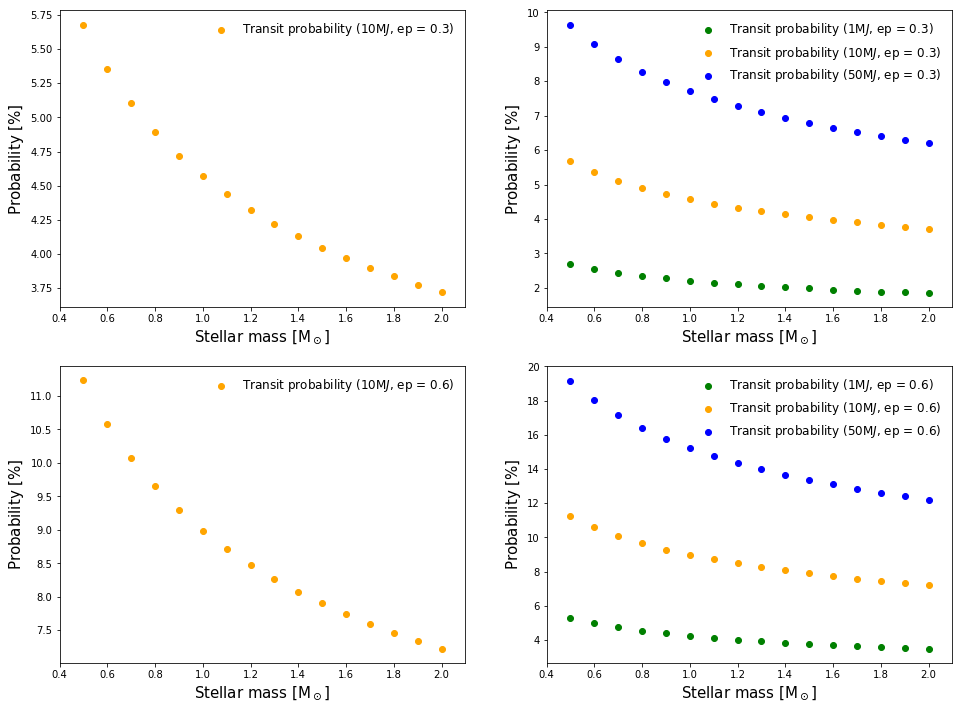

In [5]:
fig, ((axA, axB), (axC, axD)) =  plt.subplots(figsize = (16,12), nrows = 2, ncols = 2)

axA.scatter(Star_mass, 100*Prob_2, color = 'orange', label = r'Transit probability (10M$J$, ep = 0.3)')
axA.set_xlim(0.4, 2.1)
#axA.set_ylim(np.min(Prob) - 0.001, np.max(Prob) + 0.001)
axA.set_xlabel(r'Stellar mass [M$_\odot$]', size = 15)
axA.set_ylabel(r'Probability [$\%$]', size = 15)
axA.legend(frameon = False, prop = {'size': 12})

axB.scatter(Star_mass, 100*Prob_1, color = 'green', label = r'Transit probability (1M$J$, ep = 0.3)')
axB.scatter(Star_mass, 100*Prob_2, color = 'orange', label = r'Transit probability (10M$J$, ep = 0.3)')
axB.scatter(Star_mass, 100*Prob_3, color = 'blue', label = r'Transit probability (50M$J$, ep = 0.3)')
axB.set_xlim(0.4, 2.1)
#axB.set_ylim(np.min(Prob) - 0.001, np.max(Prob) + 0.001)
axB.set_xlabel(r'Stellar mass [M$_\odot$]', size = 15)
axB.set_ylabel(r'Probability [$\%$]', size = 15)
axB.legend(frameon = False, prop = {'size': 12})

axC.scatter(Star_mass, 100*Prob_5, color = 'orange', label = r'Transit probability (10M$J$, ep = 0.6)')
axC.set_xlim(0.4, 2.1)
#axC.set_ylim(np.min(Prob) - 0.001, np.max(Prob) + 0.001)
axC.set_xlabel(r'Stellar mass [M$_\odot$]', size = 15)
axC.set_ylabel(r'Probability [$\%$]', size = 15)
axC.legend(frameon = False, prop = {'size': 12})

axD.scatter(Star_mass, 100*Prob_4, color = 'green', label = r'Transit probability (1M$J$, ep = 0.6)')
axD.scatter(Star_mass, 100*Prob_5, color = 'orange', label = r'Transit probability (10M$J$, ep = 0.6)')
axD.scatter(Star_mass, 100*Prob_6, color = 'blue', label = r'Transit probability (50M$J$, ep = 0.6)')
axD.set_xlim(0.4, 2.1)
#axD.set_ylim(np.min(Prob) - 0.001, np.max(Prob) + 0.001)
axD.set_xlabel(r'Stellar mass [M$_\odot$]', size = 15)
axD.set_ylabel(r'Probability [$\%$]', size = 15)
axD.legend(frameon = False, prop = {'size': 12})

plt.savefig('Transit_Prob.png')

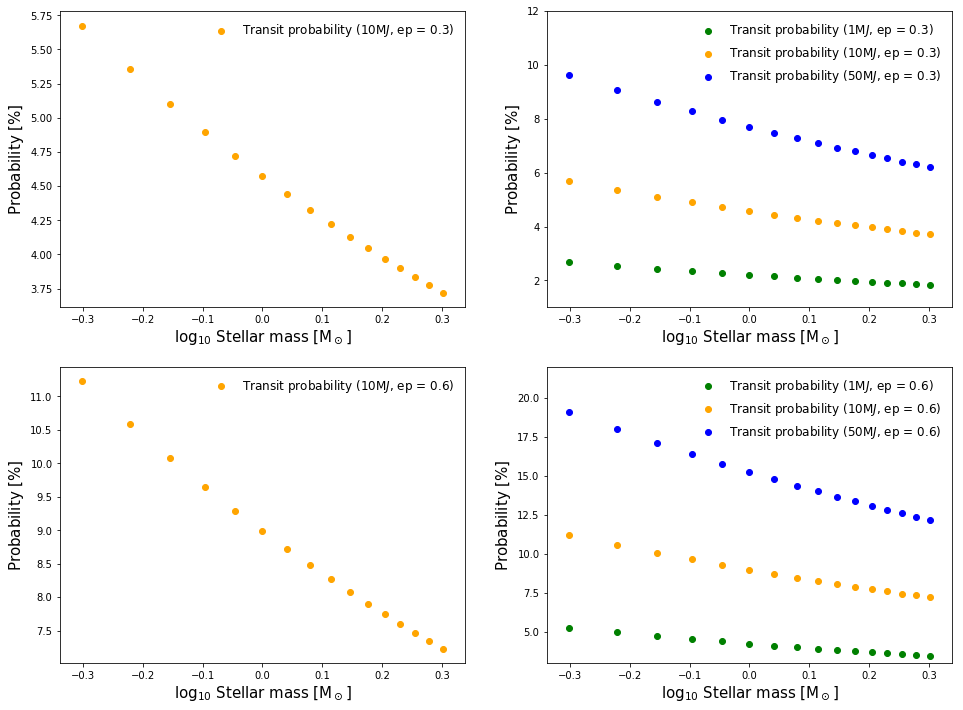

In [6]:
fig, ((axA, axB), (axC, axD)) =  plt.subplots(figsize = (16,12), nrows = 2, ncols = 2)

axA.scatter(np.log10(Star_mass), 100*Prob_2, color = 'orange', label = r'Transit probability (10M$J$, ep = 0.3)')
#axA.set_xlim(0.4, 2.1)
#axA.set_ylim(np.min(Prob) - 0.001, np.max(Prob) + 0.001)
axA.set_xlabel(r'log$_{10}$ Stellar mass [M$_\odot$]', size = 15)
axA.set_ylabel(r'Probability [$\%$]', size = 15)
axA.legend(frameon = False, prop = {'size': 12})

axB.scatter(np.log10(Star_mass), 100*Prob_1, color = 'green', label = r'Transit probability (1M$J$, ep = 0.3)')
axB.scatter(np.log10(Star_mass), 100*Prob_2, color = 'orange', label = r'Transit probability (10M$J$, ep = 0.3)')
axB.scatter(np.log10(Star_mass), 100*Prob_3, color = 'blue', label = r'Transit probability (50M$J$, ep = 0.3)')
#axB.set_xlim(0.4, 2.1)
axB.set_ylim(1.0, 12)
axB.set_xlabel(r'log$_{10}$ Stellar mass [M$_\odot$]', size = 15)
axB.set_ylabel(r'Probability [$\%$]', size = 15)
axB.legend(frameon = False, prop = {'size': 12})

axC.scatter(np.log10(Star_mass), 100*Prob_5, color = 'orange', label = r'Transit probability (10M$J$, ep = 0.6)')
#axC.set_xlim(0.4, 2.1)
#axC.set_ylim(1.0, 12)
axC.set_xlabel(r'log$_{10}$ Stellar mass [M$_\odot$]', size = 15)
axC.set_ylabel(r'Probability [$\%$]', size = 15)
axC.legend(frameon = False, prop = {'size': 12})

axD.scatter(np.log10(Star_mass), 100*Prob_4, color = 'green', label = r'Transit probability (1M$J$, ep = 0.6)')
axD.scatter(np.log10(Star_mass), 100*Prob_5, color = 'orange', label = r'Transit probability (10M$J$, ep = 0.6)')
axD.scatter(np.log10(Star_mass), 100*Prob_6, color = 'blue', label = r'Transit probability (50M$J$, ep = 0.6)')
#axD.set_xlim(0.4, 2.1)
axD.set_ylim(3.0, 22)
axD.set_xlabel(r'log$_{10}$ Stellar mass [M$_\odot$]', size = 15)
axD.set_ylabel(r'Probability [$\%$]', size = 15)
axD.legend(frameon = False, prop = {'size': 12})

plt.savefig('Transit_Prob_log.png')

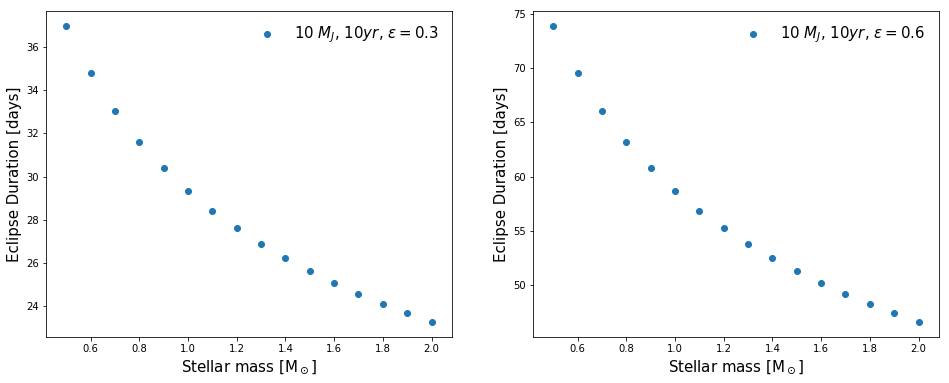

In [7]:
def Eclipsing_Time(M, m, P, epsilon):
    return P * (epsilon / np.pi) * (m / (2.0*M))**(1.0/3.0)

fig, ((axA, axB)) = plt.subplots(figsize = (16,6), nrows = 1, ncols = 2)

axA.scatter(Star_mass, Eclipsing_Time(M = Star_mass, m = Planet_mass, P = Planet_period, epsilon = 0.3), label = r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$')
axA.set_xlabel(r'Stellar mass [M$_\odot$]', size = 15)
axA.set_ylabel('Eclipse Duration [days]', size = 15)
axA.legend(frameon = False, prop = {'size': 15})

axB.scatter(Star_mass, Eclipsing_Time(M = Star_mass, m = Planet_mass, P = Planet_period, epsilon = 0.6), label = r'$10$ $M_J$, $10yr$, $\epsilon = 0.6$')
axB.set_xlabel(r'Stellar mass [M$_\odot$]', size = 15)
axB.set_ylabel('Eclipse Duration [days]', size = 15)
axB.legend(frameon = False, prop = {'size': 15})

plt.savefig('Eclipse_duration.png')

In [8]:
def Transit_number(Probability, Period, H, D, G):
    return Probability*(H + D - G) / Period

Probability = Prob_2
Period      = Planet_period
H           = 70*5.116e-5
D           = Eclipsing_Time(Star_mass, Planet_mass, Planet_period, epsilon = 0.3)
G           = 10 

Number_of_Transits = Transit_number(Probability, Period, H, D, G)
Number_of_Stars    = Number_of_Transits**(-1)

print(Star_mass)

print(Number_of_Transits)

print(Number_of_Stars)

#D_test = Eclipsing_Time(Star_mass[0], Planet_mass, Planet_period, epsilon = 0.3)
#print(Star_mass[0], Planet_mass, Planet_period, Prob_2[0][0])
#print(Transit_number(Prob_2[0][0], Period, H, D_test, G))

[ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2. ]
[[ 0.00083857  0.00072767  0.00064462  0.0005798   0.00052761  0.00048457
   0.00044838  0.00041749  0.00039075  0.00036736  0.00034671  0.00032831
   0.00031182  0.00029693  0.00028341  0.00027108]]
[[ 1192.50234831  1374.25495911  1551.30531955  1724.74617433  1895.3526644
   2063.70008078  2230.23064426  2395.29399702  2559.17307518
   2722.10135342  2884.27474619  3045.86006478  3207.0011785   3367.82360084
   3528.43796786  3688.94272017]]


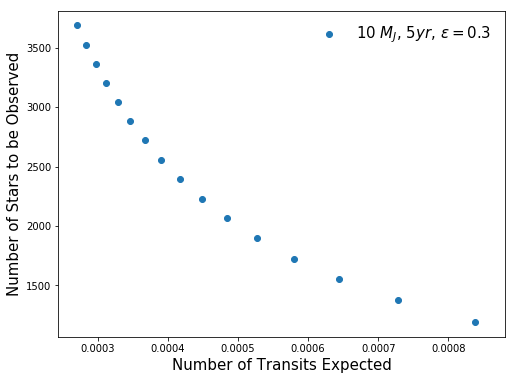

In [9]:
plt.figure(figsize = (8,6))
plt.scatter(Number_of_Transits, Number_of_Stars, label = r'$10$ $M_J$, $5yr$, $\epsilon = 0.3$')
#plt.scatter(Number_of_Transits, Star_mass, label = r'$10$ $M_J$, $5yr$, $\epsilon = 0.3$')
plt.xlim(np.min(Number_of_Transits)-0.1*np.min(Number_of_Transits), np.max(Number_of_Transits+0.05*np.max(Number_of_Transits)))
plt.xlabel('Number of Transits Expected', size = 15)
plt.ylabel('Number of Stars to be Observed', size = 15)
plt.legend(frameon = False, prop = {'size': 15})

plt.savefig('Number_of_Transits.png')

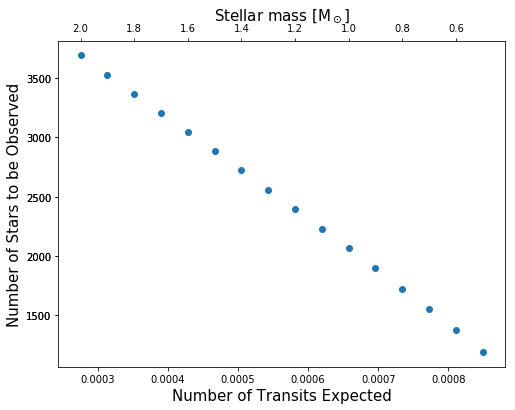

In [10]:
fig = plt.figure(figsize = (8,6))
ax  = fig.add_subplot(111, label = "1")
ax2 = fig.add_subplot(111, label = "2", frame_on = False)

ax.plot(Number_of_Transits, Number_of_Stars, label = r'$10$ $M_J$, $5yr$, $\epsilon = 0.3$')
ax.set_xlabel('Number of Transits Expected', size = 15)
ax.set_ylabel('Number of Stars to be Observed', size = 15)
ax.set_xlim(np.min(Number_of_Transits)-0.1*np.min(Number_of_Transits), np.max(Number_of_Transits+0.05*np.max(Number_of_Transits)))

ax2.scatter(Star_mass, Number_of_Stars)
ax2.xaxis.tick_top()
ax2.set_xlabel(r'Stellar mass [M$_\odot$]', size = 15) 
ax2.xaxis.set_label_position('top') 
ax2.invert_xaxis()

plt.savefig('Number_of_Transits_StellarMass.png')

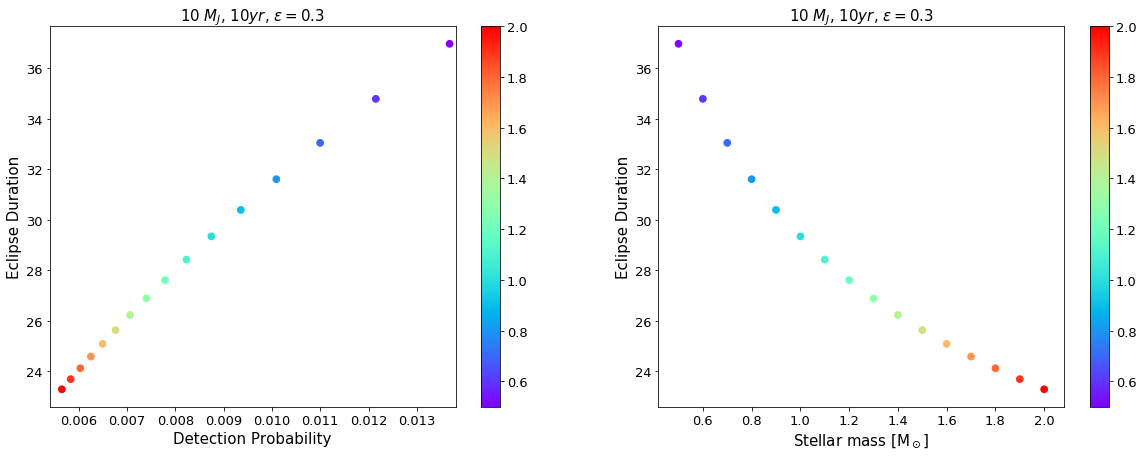

In [11]:
'''Probability to detect ringed-systems with Gaia in 5yr observations
The probability will be given by: P1 x P2 x P3 x P4 where:
P1 = Probability the star has a planet (17% from Cassen et al. 2012)
P2 = Probability a planet has a Hill sphere (100%)
P3 = Probability of a transit ( (R_star + RH)/a )
P4 = Probability of detecting the transit with Gaia'''

def Prob_total(p1, p2, p3, p4):
    return np.array(p1*p2*p3*p4)

E_time = Eclipsing_Time(M = Star_mass, m = Planet_mass, P = Planet_period, epsilon = 0.3)
P1     = 0.17    #Cassen et al. 2012 for (0.3-10M_J) within (0.5-10AU)
P2     = 1.00    #Best case
P3     = Prob_2  #Planet_mass = 10M_J, Planet_period = 5yr, epsilon = 0.3
P4     = (70.0 / Planet_period)*E_time

#print(P3)
#print(P4)
#print(P1*P3*P4)

#print(Prob_total(P1, P2, P3, P4))
#print(Star_mass)
#print(E_time)

plt.rc('xtick', labelsize = 13) 
plt.rc('ytick', labelsize = 13)

Color = np.linspace(0.5, 2.0, 16)     #Creates 16 different colors
cm    = plt.cm.get_cmap('rainbow')    #This is the color map used

fig, ((axA, axB)) = plt.subplots(figsize = (20,7), nrows = 1, ncols = 2)

A = axA.scatter(Prob_total(P1, P2, P3, P4), E_time, c  = Color, cmap = cm, s = 45)
axA.set_xlabel('Detection Probability', size = 15)
axA.set_ylabel('Eclipse Duration', size = 15)
axA.set_xlim(0.0054, 0.0138)
axA.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$', size = 15)
plt.colorbar(A, ax = axA)

B = axB.scatter(Star_mass, E_time, c = Color, cmap = cm, s = 45)
axB.set_xlabel(r'Stellar mass [M$_\odot$]', size = 15) 
axB.set_ylabel(r'Eclipse Duration', size = 15)
axB.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$', size = 15)
plt.colorbar(B, ax = axB)

plt.savefig('Detection_Prob.png')

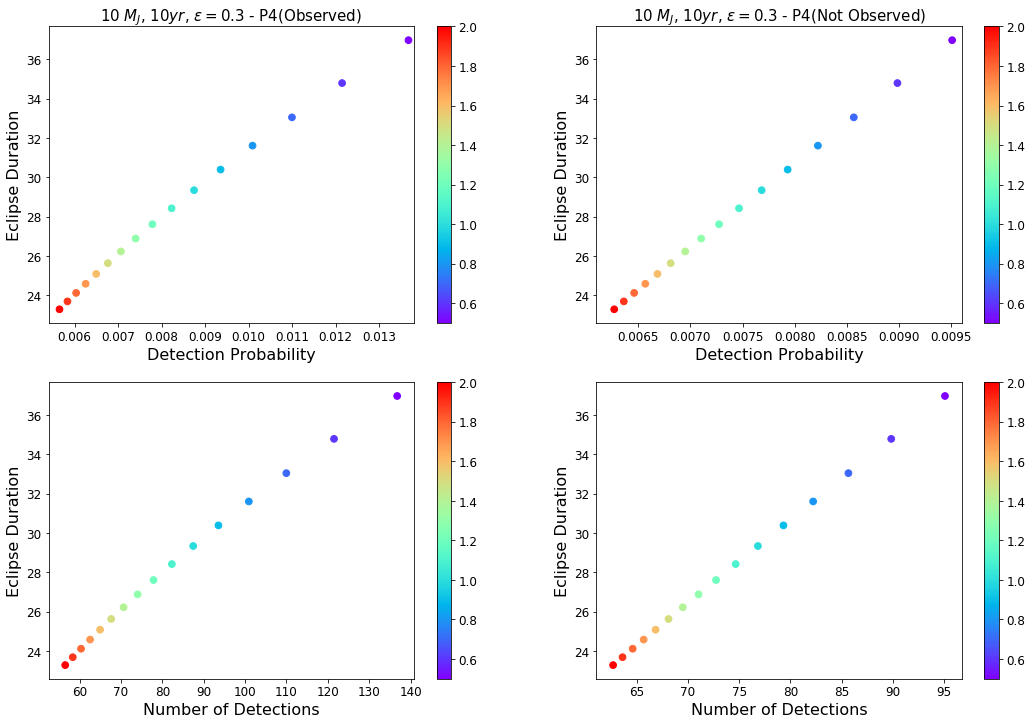

In [12]:
E_time = Eclipsing_Time(M = Star_mass, m = Planet_mass, P = Planet_period, epsilon = 0.3)
P1     = 0.17    #Cassen et al. 2012 for (0.3-10M_J) within (0.5-10AU)
P2     = 1.00    #Best case
P3     = Prob_2  #Planet_mass = 10M_J, Planet_period = 5yr, epsilon = 0.3
P4_1   = (70.0 / Planet_period)*E_time
P4_2   = 1.0 - (70.0 / (Planet_period*100.0) )*E_time

plt.rc('xtick', labelsize = 12) 
plt.rc('ytick', labelsize = 12) 

fig, ((axA, axB), (axC, axD)) = plt.subplots(figsize = (18,12), nrows = 2, ncols = 2)

A = axA.scatter(Prob_total(P1, P2, P3, P4_1), E_time, c  = Color, cmap = cm, s = 45)
axA.set_xlabel('Detection Probability', size = 16)
axA.set_ylabel('Eclipse Duration', size = 16)
axA.set_xlim(0.0054, 0.0138)
axA.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$ - P4(Observed)', size = 15)
plt.colorbar(A, ax = axA)

B = axB.scatter(Prob_total(P1, P2, P3, P4_2), E_time, c  = Color, cmap = cm, s = 45)
axB.set_xlabel('Detection Probability', size = 16)
axB.set_ylabel('Eclipse Duration', size = 16)
axB.set_xlim(0.0061, 0.0096)
axB.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$ - P4(Not Observed)', size = 15)
plt.colorbar(B, ax = axB)

C = axC.scatter(Prob_total(P1, P2, P3, P4_1)*10000, E_time, c  = Color, cmap = cm, s = 45)
axC.set_xlabel('Number of Detections', size = 16)
axC.set_ylabel('Eclipse Duration', size = 16)
#axC.set_xlim(0.0054, 0.0138)
#axC.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$ - P4(Observed)', size = 15)
plt.colorbar(C, ax = axC)

D = axD.scatter(Prob_total(P1, P2, P3, P4_2)*10000, E_time, c  = Color, cmap = cm, s = 45)
axD.set_xlabel('Number of Detections', size = 16)
axD.set_ylabel('Eclipse Duration', size = 16)
#axD.set_xlim(0.0061, 0.0096)
#axD.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$ - P4(Not Observed)', size = 15)
plt.colorbar(D, ax = axD)

plt.savefig('Detection_Prob_Number.png')

In [13]:
'''If I assume the probability is distributed as a Binomial Distribution
then I can rewrite the latest probability in terms of k = success, n = trials and p[0,1]
success probability in each trial'''

def Binomial_Prob(k, n, p):
    Binomial = fac(n) / ( fac(k)*fac(n - k) )
    return Binomial * p**k * (1.0 - p)**(n-k)

#Binomial_Prob(1,70,1/60.)

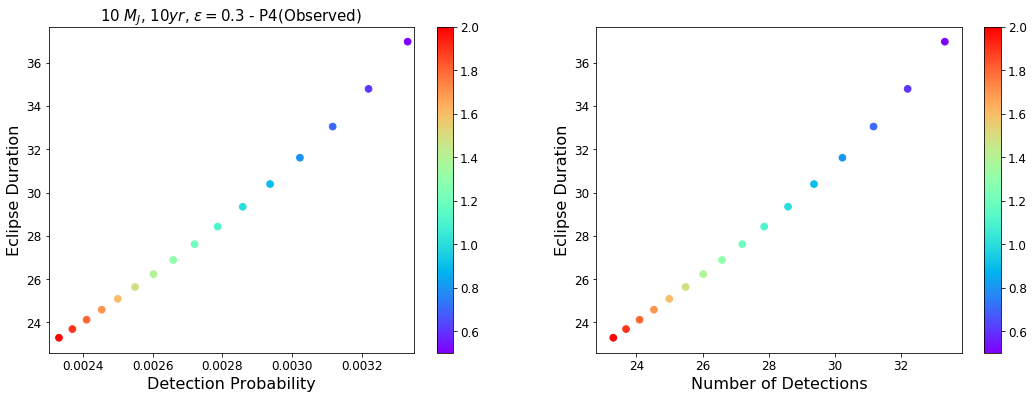

In [14]:
E_time = Eclipsing_Time(M = Star_mass, m = Planet_mass, P = Planet_period, epsilon = 0.3)
P1_3     = 0.17    #Cassen et al. 2012 for (0.3-10M_J) within (0.5-10AU)
P2_3     = 1.00    #Best case
P3_3     = Prob_2  #Planet_mass = 10M_J, Planet_period = 5yr, epsilon = 0.3
P4_3     = Binomial_Prob(1.0, 70.0, E_time/Planet_period)
#P4_4     = 1.0 - 0.0003*Binomial_Prob(1.0, 70.0, E_time/Planet_period)

plt.rc('xtick', labelsize = 12) 
plt.rc('ytick', labelsize = 12) 

fig, ((axA, axC)) = plt.subplots(figsize = (18,6), nrows = 1, ncols = 2)

A = axA.scatter(Prob_total(P1_3, P2_3, P3_3, P4_3), E_time, c  = Color, cmap = cm, s = 45)
axA.set_xlabel('Detection Probability', size = 16)
axA.set_ylabel('Eclipse Duration', size = 16)
axA.set_xlim(0.0023, 0.00335)
axA.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$ - P4(Observed)', size = 15)
plt.colorbar(A, ax = axA)

# B = axB.scatter(Prob_total(P1_3, P2_3, P3_3, P4_4), E_time, c  = Color, cmap = cm, s = 45)
# axB.set_xlabel('Detection Probability', size = 16)
# axB.set_ylabel('Eclipse Duration', size = 16)
# axB.set_xlim(0.0023, 0.0035)
# axB.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$ - P4(Not Observed)', size = 15)
# plt.colorbar(B, ax = axB)

C = axC.scatter(Prob_total(P1_3, P2_3, P3_3, P4_3)*10000, E_time, c  = Color, cmap = cm, s = 45)
axC.set_xlabel('Number of Detections', size = 16)
axC.set_ylabel('Eclipse Duration', size = 16)
#axC.set_xlim(0.0054, 0.0138)
#axC.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$ - P4(Observed)', size = 15)
plt.colorbar(C, ax = axC)

# D = axD.scatter(Prob_total(P1_3, P2_3, P3_3, P4_4)*10000, E_time, c  = Color, cmap = cm, s = 45)
# axD.set_xlabel('Number of Detections', size = 16)
# axD.set_ylabel('Eclipse Duration', size = 16)
# #axD.set_xlim(0.0061, 0.0096)
# #axD.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$ - P4(Not Observed)', size = 15)
# plt.colorbar(D, ax = axD)

plt.savefig('Detection_Prob_Number_2.png')

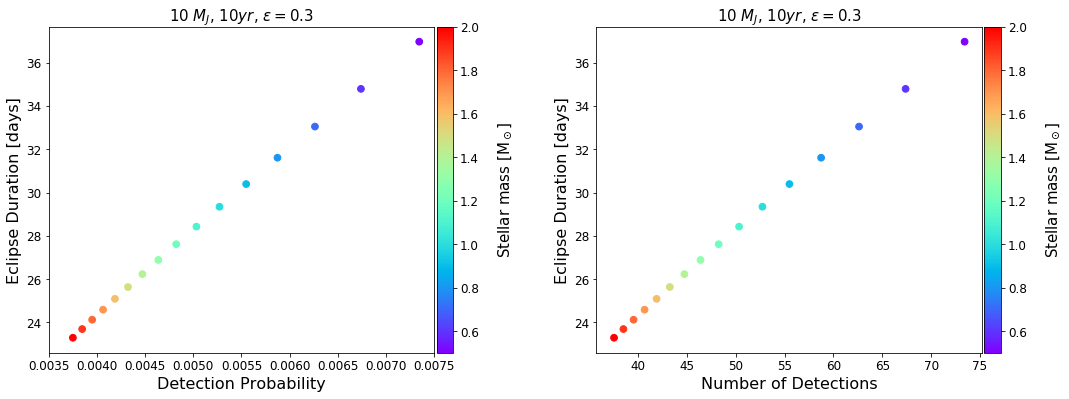

In [57]:
'''After trying a lot, this is the final probability which is pretty close to the results
obtained assuming the distribution is binomial.'''

def Real_prob(Gaia_lifetime, Eclising_duration, Trials):
    return 1.0 - ( (Gaia_lifetime - Eclising_duration) / Gaia_lifetime )**Trials

E_time = Eclipsing_Time(M = Star_mass, m = Planet_mass, P = Planet_period, epsilon = 0.3)
P1_4     = 0.17    #Cassen et al. 2012 for (0.3-10M_J) within (0.5-10AU)
P2_4     = 1.00    #Best case
P3_4     = Prob_2  #Planet_mass = 10M_J, Planet_period = 5yr, epsilon = 0.3
P4_4     = Real_prob(Planet_period, E_time, 70.0)

plt.rc('xtick', labelsize = 12) 
plt.rc('ytick', labelsize = 12) 

fig, ((axA, axB)) = plt.subplots(figsize = (18,6), nrows = 1, ncols = 2)

A = axA.scatter(Prob_total(P1_4, P2_4, P3_4, P4_4), E_time, c  = Color, cmap = cm, s = 45)
axA.set_xlabel('Detection Probability', size = 16)
axA.set_ylabel('Eclipse Duration [days]', size = 16)
axA.set_xlim(0.0035, 0.0075)
axA.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$', size = 15)
cbar_A = plt.colorbar(A, ax = axA, pad = 0.005)
cbar_A.set_label(r'Stellar mass [M$_\odot$]', rotation = 90, size = 15, labelpad = 17)

B = axB.scatter(Prob_total(P1_4, P2_4, P3_4, P4_4)*10000, E_time, c  = Color, cmap = cm, s = 45)
axB.set_xlabel('Number of Detections', size = 16)
axB.set_ylabel('Eclipse Duration [days]', size = 16)
axB.set_title(r'$10$ $M_J$, $10yr$, $\epsilon = 0.3$', size = 15)
cbar_B = plt.colorbar(B, ax = axB, pad = 0.005)
cbar_B.set_label(r'Stellar mass [M$_\odot$]', rotation = 90, size = 15, labelpad = 17)

plt.savefig('Detection_Prob_Number_Correct.png')